In [2]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

import tensorflow as tf
from numpy.random import seed

# Getting the data

In [3]:
digits = load_digits()

See the notebook for lecture 8 for an exploration of this dataset.

In [4]:
X = digits.data
y = digits.target
Y = to_categorical(y, 10)
X = X.reshape([-1, 8, 8, 1])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)

# Training the neural network

In [5]:
seed(0)
tf.random.set_seed(0)

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'tanh', input_shape = X_train[0].shape)) 
#32 feature maps, 3-by-3 local receptive fields
model.add(MaxPooling2D(pool_size = (2,2))) #pooling layer
model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax')) #output layer

sgd = optimizers.SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 10, batch_size = 50, validation_split = 0.3, verbose = 1)

Epoch 1/10
19/19 [==============================] - 1s 9ms/step - loss: 1.7183 - accuracy: 0.4883 - val_loss: 0.5456 - val_accuracy: 0.8815
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.9161 - val_loss: 0.3214 - val_accuracy: 0.9383
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9639 - val_loss: 0.2808 - val_accuracy: 0.9309
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9777 - val_loss: 0.2210 - val_accuracy: 0.9432
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9894 - val_loss: 0.1893 - val_accuracy: 0.9531
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9883 - val_loss: 0.1831 - val_accuracy: 0.9506
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9915 - val_loss: 0.1765 - val_accuracy: 0.9556
Epoch 8/10
19/19 [==

# Evaluate the model

In [6]:
print("Accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

15/15 [==============================] - 0s 779us/step - loss: 0.0994 - accuracy: 0.9800
Accuracy on test data: [0.0993817150592804, 0.9800000190734863]


Text(0, 0.5, 'Accuracy')

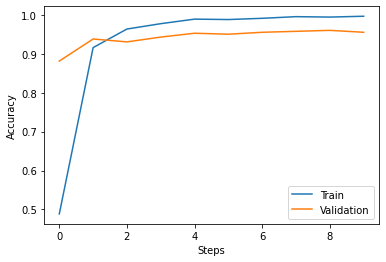

In [7]:
steps = len(history.history['accuracy'])
plt.plot(np.arange(steps), history.history['accuracy'], label = 'Train')
plt.plot(np.arange(steps), history.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Accuracy')